<b>Data Description:</b><br>
Data Source:<br>
- This data is acquired from https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit?gid=1150341366#gid=1150341366 as .xlsx file and converted to data.csv file.<br>
- This dataset contains the following columns:<br>
1.	Id:	To count the records.<br>
2.	MSSubClass:	 Identifies the type of dwelling involved in the sale.<br>
3.	MSZoning:	Identifies the general zoning classification of the sale.<br>
4.	LotArea:	 Lot size in square feet.<br>
5.	LotConfig:	Configuration of the lot<br>
6.	BldgType:	Type of dwelling<br>
7.	OverallCond:	Rates the overall condition of the house<br>
8.	YearBuilt:	Original construction year<br>
9.	YearRemodAdd:	Remodel date (same as construction date if no remodeling or additions).<br>
11.	BsmtFinSF2:	Type 2 finished square feet.<br>
12.	TotalBsmtSF:	Total square feet of basement area<br>
13.	SalePrice:	To be predicted<br>
<b>Data Question:</b><br>
- What factors are significant in predciting sale price of houses? And what price is the house based on given factors's information?<br>
The response variable: SalePrice<br>
The possible predictors:  MSSubClass, MSZoning, LotArea, LotConfig, BldgType, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF2, TotalBsmtSF<br>


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Load and show the first 10 rows of the data to see data's structure
df = pd.read_csv('data.csv')
df.head(10)

Using matplotlib backend: module://matplotlib_inline.backend_inline


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [2]:
# Check data type of each variable an correct the data type
df.info()

# Drop Id column
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)
    
# Count categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool'])
print(f'Number of categorical columns: {len(categorical_columns.columns)}')
print(categorical_columns.columns)

# Count numeric columns:
numeric_columns = df.select_dtypes(include=['number'])
print(f'Number of numeric columns: {len(numeric_columns.columns)}')
print(numeric_columns.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
Number of categorical columns: 4
Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
Number of numeric columns: 8
Index(['MSSubClass', 'LotArea', 'OverallCond',

- This dataset has 2919 entries and 13 columns.<br>
- That includes:
4 categorical variables: 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'<br>
9 numeric varibles: 'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'

In [3]:
# Check data statistic of numeric variables
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [4]:
# Check missing/null values of data
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

- MSZoning has 4 null values<br>
- Exterior1st has 1 null values<br>
- BsmtFinSF2 has 1 null values<br>
- TotalBsmtSF has 1 null values<br>
- SalePrice has 1459 null values<br>

In [5]:
# Replace null values with mean values and remove duplicate rows if any in the dataset
df. drop_duplicates(inplace=True)

# Fill na for categorical variables
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)

# Fill na for numeric variables
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace = True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace = True)
df['SalePrice'].fillna(df['SalePrice'].mean(), inplace = True)
df.shape

(2911, 12)

After cleaning:<br>
- This dataset has 2911 entries and 12 columns.<br>
- That includes:
4 categorical variables: 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'<br>
9 numeric varibles: 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'

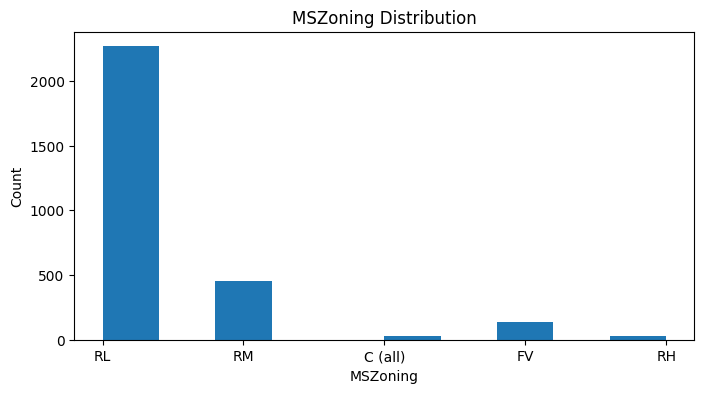

In [72]:
# # Plot bar chart to see the distribution of each variable
# value_count = df['MSZoning'].value_counts().reset_index()
# value_count.columns = ['Category', 'Count']
# plot = px.bar(value_count, x='Category', y='Count', title='MSZoning Category Distribution')
# pyo.iplot(plot)
plt.figure(figsize=(8,4))
plt.hist(df['MSZoning'])
plt.title('MSZoning Distribution')
plt.xlabel('MSZoning')
plt.ylabel('Count')
plt.show()

Key Trends:

Residential Low-Density (RL) is the Most Common Zoning:

The tallest bar in the histogram corresponds to "RL" (Residential Low Density), indicating that the majority of properties in this dataset are in areas zoned for low-density residential use. This suggests a predominance of single-family homes on larger lots.
Significantly Fewer Properties in Other Zoning Categories:

The next most common zoning category is "RM" (Residential Medium Density), but it has far fewer properties compared to "RL." This indicates that medium-density residential areas (e.g., apartments or smaller lots) are less common.
Very Few Commercial and High-Density Residential Zones:

Categories like "C (all)" (Commercial), "FV" (Floating Village Residential), and "RH" (Residential High Density) have very low counts, suggesting that commercial areas and high-density residential areas are rare in this dataset.
Right-Skewed Distribution:

The distribution is heavily right-skewed, with a large concentration of properties in low-density residential zones and fewer properties in higher density or commercial zones.

Summary:
The histogram indicates that the vast majority of properties in this dataset are located in areas zoned for low-density residential use (RL). There are significantly fewer properties in medium-density residential areas (RM) and very few in commercial or high-density residential zones. This distribution reflects a housing market that is predominantly composed of low-density residential zoning, likely catering to single-family homes.

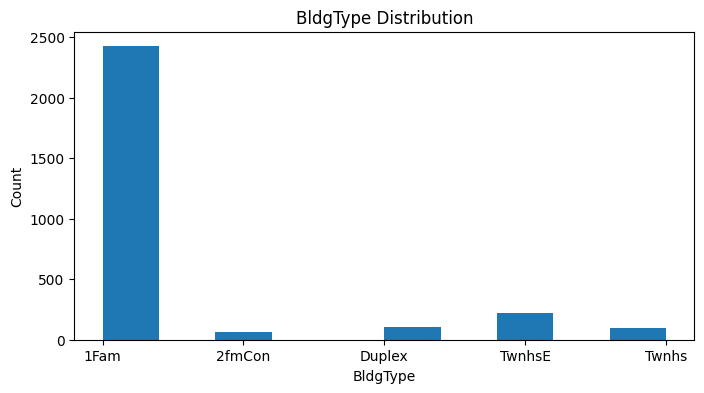

In [71]:
# value_count = df['LotConfig'].value_counts().reset_index()
# value_count.columns = ['Category', 'Count']
# plot1 = px.bar(value_count, x='Category', y='Count', title='LotConfig Category Distribution')
# pyo.iplot(plot1)

plt.figure(figsize=(8,4))
plt.hist(df['BldgType'])
plt.title('BldgType Distribution')
plt.xlabel('BldgType')
plt.ylabel('Count')
plt.show()

Most Common Lot Configuration:<br>
"Inside": The "Inside" lot configuration is the most common, with a count of 2125. This suggests that most properties in the dataset have this type of lot configuration, which is likely a typical interior lot without special frontage or corner exposure.

Less Common Configurations:<br>
"Corner": The "Corner" configuration is the next most common, with a count of 511. Corner lots often have more street frontage and may be more desirable in certain contexts.

"CulDSac": Cul-de-Sac lots have a count of 176, indicating that they are less common but still significant. These lots are typically located at the end of a dead-end street and may offer more privacy or reduced traffic.

Rare Configurations:<br>
"FR2": Frontage Type 2 has a low count of 85, making it one of the less common configurations.

"FR3": Frontage Type 3 is the rarest configuration in the dataset, with only 14 occurrences. This suggests that this particular frontage type is uncommon.

Conclusion:<br>
The chart indicates a clear dominance of "Inside" lot configurations in the dataset, with corner lots being the second most common. Cul-de-Sac lots are present but less frequent, while Frontage Types 2 and 3 are quite rare. This distribution could reflect common lot configurations in residential areas, with most properties being standard interior lots, while specialized lot types like corner lots, Cul-de-Sac, and various frontage types are less frequent.

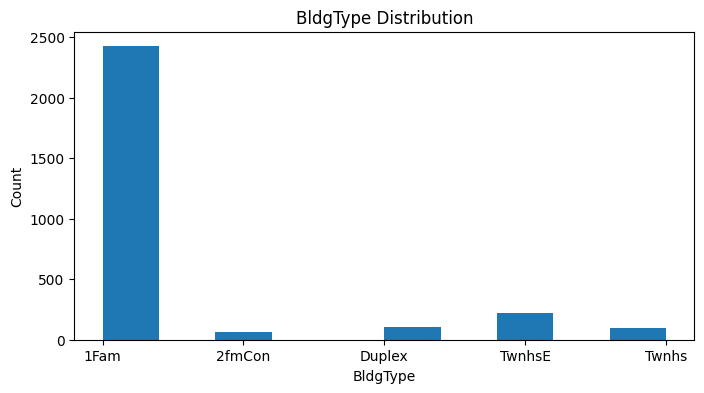

In [73]:
# value_count = df['BldgType'].value_counts().reset_index()
# value_count.columns = ['Category', 'Count']
# plot2 = px.bar(value_count, x='Category', y='Count', title='BldgType Category Distribution')
# pyo.iplot(plot2)

plt.figure(figsize=(8,4))
plt.hist(df['BldgType'])
plt.title('BldgType Distribution')
plt.xlabel('BldgType')
plt.ylabel('Count')
plt.show()

Key Trends:

Single-Family Homes Dominate:

The tallest bar in the histogram corresponds to "1Fam" (Single-Family homes), indicating that the vast majority of properties in this dataset are single-family residences. This suggests a market heavily focused on single-family housing.
Few Multi-Family and Townhouse Properties:

The next few categories, such as "2fmCon" (Two-Family Conversion), "Duplex," "TwnhsE" (Townhouse End Unit), and "Twnhs" (Townhouse Inside Unit), have significantly lower counts. This indicates that multi-family and townhouse properties are much less common in this dataset compared to single-family homes.
Right-Skewed Distribution:

The distribution is heavily right-skewed, with a large concentration of single-family homes and fewer multi-family or townhouse units. This shows that single-family homes are the predominant building type.

Summary:
The histogram indicates that the vast majority of properties in this dataset are single-family homes, with very few multi-family or townhouse properties. The distribution is right-skewed, reflecting a housing market that is predominantly composed of single-family residences. This suggests a strong preference for or availability of single-family housing within this dataset.

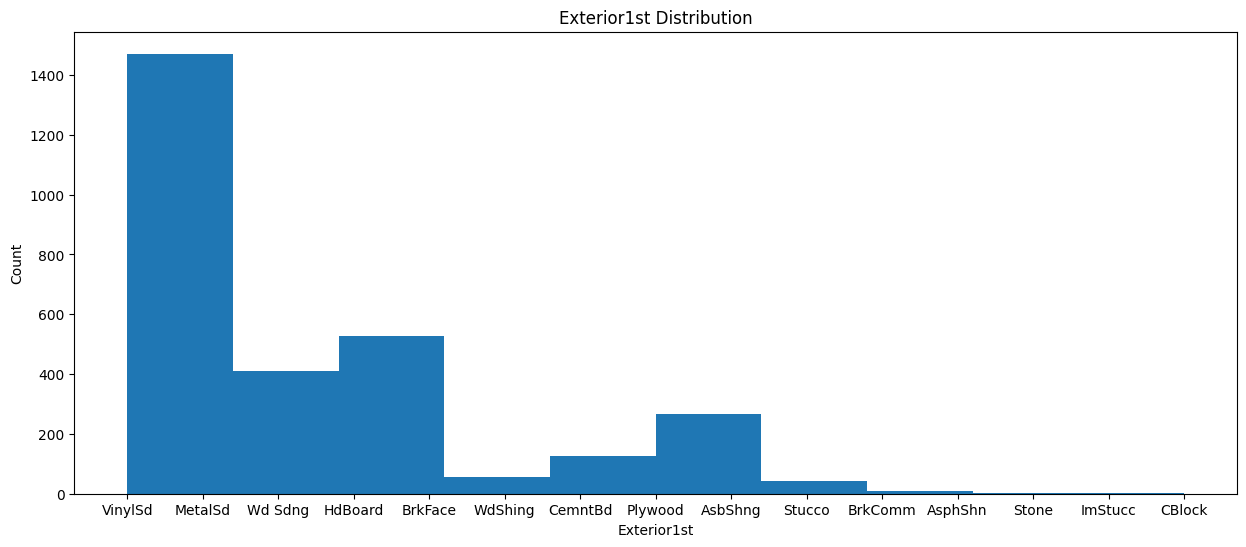

In [66]:
# value_count = df['Exterior1st'].value_counts().reset_index()
# value_count.columns = ['Category', 'Count']
# plot3 = px.bar(value_count, x='Category', y='Count', title='Exterior1st Category Distribution')
# pyo.iplot(plot3)
plt.figure(figsize=(15,6))
plt.hist(df['Exterior1st'])
plt.title('Exterior1st Distribution')
plt.xlabel('Exterior1st')
plt.ylabel('Count')
plt.show()

Key Trends:

Vinyl Siding is the Most Common Exterior:

The highest bar in the histogram corresponds to "VinylSd" (Vinyl Siding), indicating that it is the most common exterior material used on houses in this dataset. This suggests a strong preference or trend for vinyl siding among the properties.
Metal Siding and Wood Siding Are Also Common:

The next most common exteriors are "MetalSd" (Metal Siding) and "Wd Sdng" (Wood Siding), though these are less frequent than vinyl siding. These materials are still relatively popular choices for exterior finishes.
Other Exterior Materials Are Less Common:

There is a sharp drop in frequency after these three materials, with materials like "HdBoard" (Hardboard), "BrkFace" (Brick Face), and others being much less common. This suggests that while these materials are used, they are not as prevalent as vinyl, metal, or wood siding.
Right-Skewed Distribution:

The distribution is right-skewed, with a few materials dominating the market, while many others are used much less frequently. Materials like "CBlock" (Cinder Block) and "Stone" are among the least common.

Summary:
The histogram indicates that vinyl siding is by far the most common exterior material used on houses in this dataset, followed by metal siding and wood siding. Other exterior materials are much less common, with a long tail of various less frequently used materials. This reflects typical construction trends, where a few materials dominate the market while others are used in more specific or niche applications.

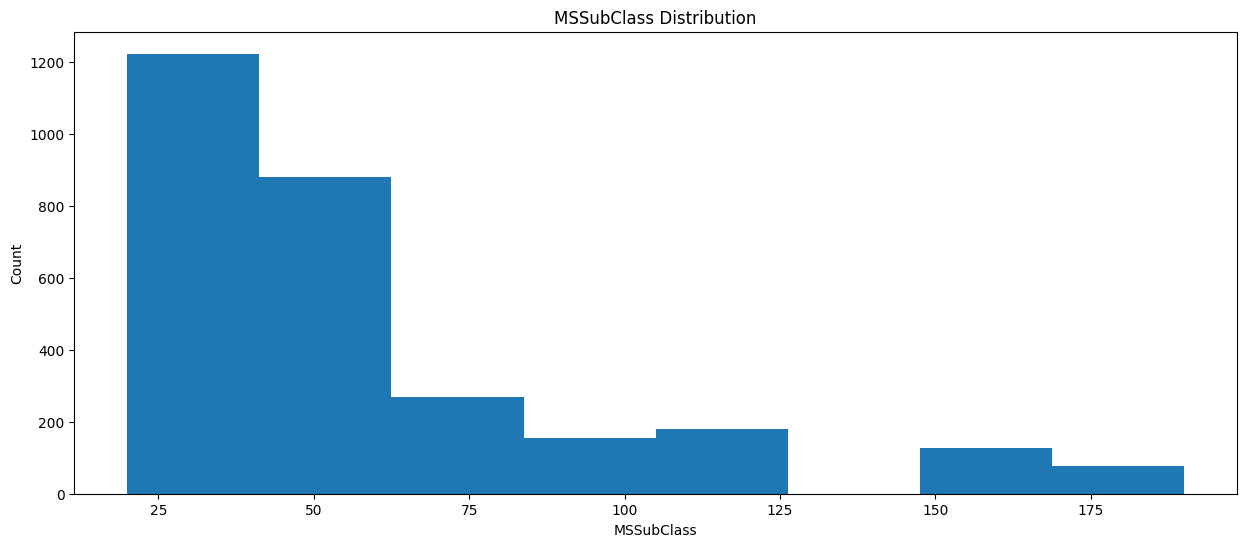

In [68]:

# # Plot Numerical Variables
# fig1 = px.histogram(df, x='MSSubClass', nbins=30, title='Histogram of MSSubClass')
# # Customize the appearance if needed
# fig1.update_layout(
#     xaxis_title='MSSubClass',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig1)
plt.figure(figsize=(15,6))
plt.hist(df['MSSubClass'], bins=8)
plt.title('MSSubClass Distribution')
plt.xlabel('MSSubClass')
plt.ylabel('Count')
plt.show()

Key Trends:

Majority of Properties in Lower MSSubClass Categories:

The highest bar in the histogram corresponds to the lower MSSubClass categories, indicating that most properties in this dataset fall within a few specific dwelling types, likely common residential styles.
Right-Skewed Distribution:

The distribution is right-skewed, meaning that there are fewer properties as you move to higher MSSubClass categories. This suggests that certain types of dwellings are much less common in this dataset.
Few Properties in Higher MSSubClass Categories:

There are significantly fewer properties in the higher MSSubClass categories (e.g., above 100), which may correspond to less common or more specialized types of housing (e.g., townhouses, multi-family dwellings).
Concentration of Properties in Specific Categories:

The histogram shows a strong concentration of properties in one or two specific MSSubClass categories, likely reflecting the most common types of residential buildings in the dataset.

Summary:
The histogram indicates that the majority of properties in this dataset belong to a few common dwelling types, represented by the lower MSSubClass categories. The distribution is right-skewed, with fewer properties in the higher MSSubClass categories, suggesting that more specialized or less common housing types are underrepresented in this dataset. This reflects a typical housing market where certain residential styles are predominant.

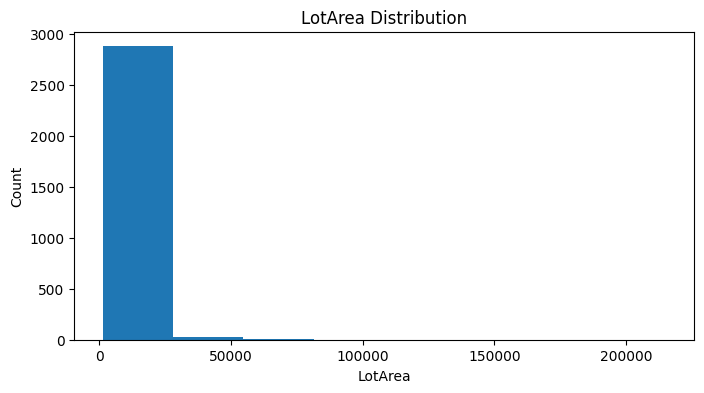

In [74]:
# # Plot Numerical Variables
# fig2 = px.histogram(df, x='LotArea', nbins=30, title='Histogram of LotArea')
# # Customize the appearance if needed
# fig2.update_layout(
#     xaxis_title='LotArea',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig2)
plt.figure(figsize=(8,4))
plt.hist(df['LotArea'], bins=8)
plt.title('LotArea Distribution')
plt.xlabel('LotArea')
plt.ylabel('Count')
plt.show()

Key Trends:

Majority of Lots Are Small to Medium-Sized:

The highest bar in the histogram represents lot areas that are clustered around a smaller size, likely under 10,000 square feet. This indicates that most properties in this dataset have relatively small to medium-sized lots.
Right-Skewed Distribution:

The distribution is heavily right-skewed, meaning that there are fewer properties with larger lot areas. As the lot size increases beyond approximately 10,000 square feet, the frequency of these larger lots drops sharply.
Few Properties with Very Large Lots:

There are very few properties with lot areas exceeding 50,000 square feet, indicating that very large lots are uncommon in this dataset.
Concentration of Lots Below 50,000 Square Feet:

Almost all the properties have lot areas below 50,000 square feet, with only a minimal number of properties exceeding this size.

Summary:
The histogram reveals that the majority of properties in this dataset have small to medium-sized lots, with most lot areas concentrated below 10,000 square feet. The distribution is right-skewed, meaning larger lots are less common, and very large lot areas (above 50,000 square feet) are rare. This reflects a typical urban or suburban housing distribution where smaller lot sizes are more prevalent.

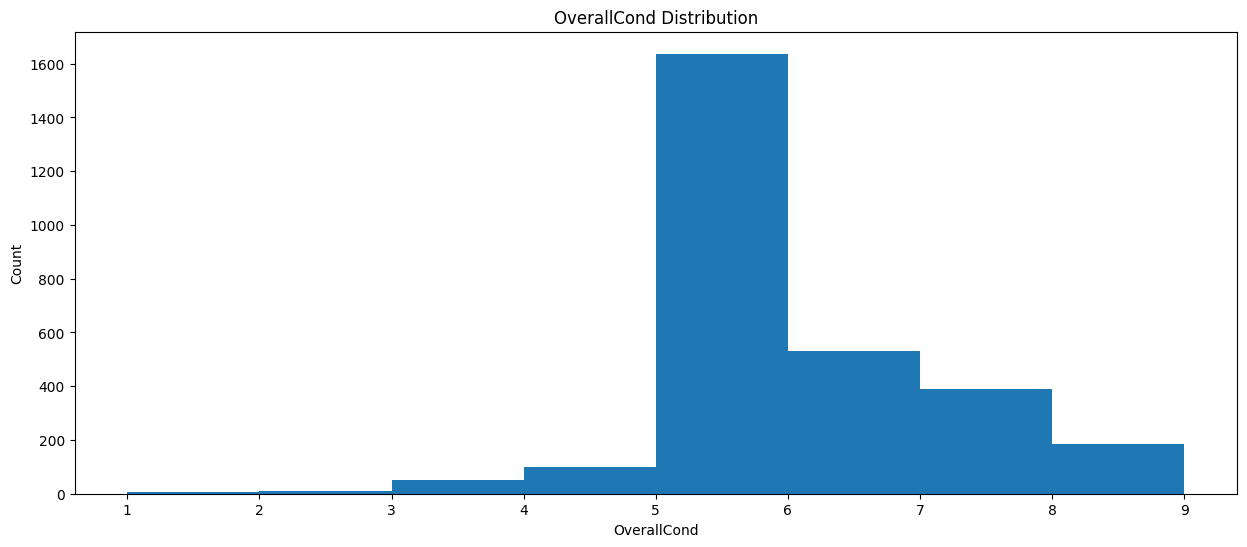

In [52]:
# # Plot Numerical Variables
# fig3 = px.histogram(df, x='OverallCond', nbins=30, title='Histogram of OverallCond')
# # Customize the appearance if needed
# fig3.update_layout(
#     xaxis_title='OverallCond',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig3)
plt.figure(figsize=(15,6))
plt.hist(df['OverallCond'], bins=8)
plt.title('OverallCond Distribution')
plt.xlabel('OverallCond')
plt.ylabel('Count')
plt.show()

Key Trends:

Majority in Average Condition (Condition 5):

The highest bar in the histogram corresponds to a condition rating of 5, indicating that most properties in this dataset are rated as being in "Average" condition. This suggests that the typical home in this dataset is neither particularly well-maintained nor in poor condition.
Decreasing Frequency with Higher Condition Ratings:

As the condition rating increases from 5 to 9, the frequency of homes in each category decreases. This indicates that fewer properties are in better-than-average condition, with even fewer in excellent condition.
Few Properties in Poor Condition (Condition 1-3):

There are very few properties rated below 4, indicating that homes in poor condition are uncommon in this dataset.
Right-Skewed Distribution:

The distribution is slightly right-skewed, meaning there are more homes in average or slightly above average condition, with fewer homes rated at the extremes (either very poor or very excellent).

Summary:
The histogram indicates that the majority of homes in this dataset are in average condition, with fewer homes being rated as above average or excellent. Properties in poor condition are relatively rare. This distribution reflects a typical housing market where most properties are maintained to a standard level, with a smaller number of homes either significantly better or worse in terms of condition.

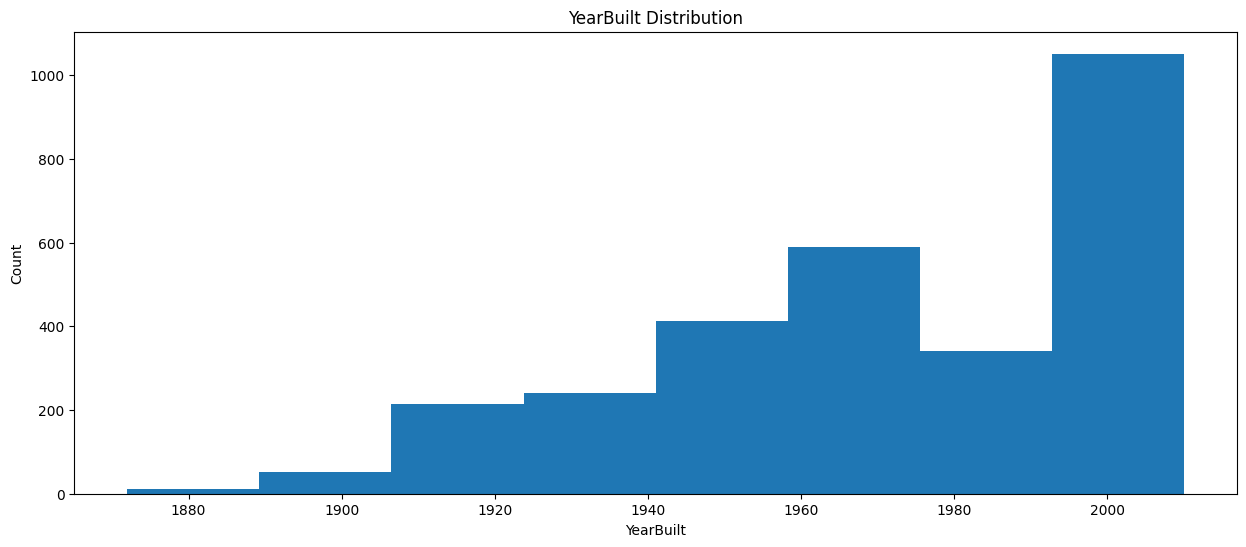

In [51]:
# # Plot Numerical Variables
# fig4 = px.histogram(df, x='YearBuilt', nbins=30, title='Histogram of YearBuilt')
# # Customize the appearance if needed
# fig4.update_layout(
#     xaxis_title='YearBuilt',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig4)
plt.figure(figsize=(15,6))
plt.hist(df['YearBuilt'], bins=8)
plt.title('YearBuilt Distribution')
plt.xlabel('YearBuilt')
plt.ylabel('Count')
plt.show()

Key Trends:

Recent Construction Boom (2000s):

The highest bar in the histogram corresponds to properties built between 2000 and 2010, indicating a significant increase in the number of homes built during this period. This suggests a construction boom or increased housing demand in the early 21st century.
Post-War Construction (1950s-1970s):

There is a noticeable number of homes built in the post-war period, particularly between 1950 and 1970. This period likely reflects the suburban expansion and housing development that occurred after World War II.
Gradual Increase Through the Early 20th Century:

The number of homes built steadily increases from the late 19th century through to the mid-20th century, with small but consistent growth in housing construction.
Low Number of Older Homes (Pre-1940s):

The histogram shows relatively few homes built before the 1940s. This indicates that older homes from the late 19th and early 20th centuries are less common in this dataset.
Dip in Construction Activity (1980s-1990s):

There is a noticeable dip in the number of homes built during the 1980s and 1990s, followed by a sharp increase in the 2000s. This could reflect economic conditions, changes in housing demand, or shifts in construction trends during those decades.

Summary:
The histogram indicates that the majority of homes in this dataset were built in the 2000s, reflecting a recent construction boom. There is also significant construction activity in the post-war period (1950s-1970s), while homes built before the 1940s are much less common. The 1980s and 1990s show a relative decline in construction activity, which picks up again dramatically in the early 21st century.

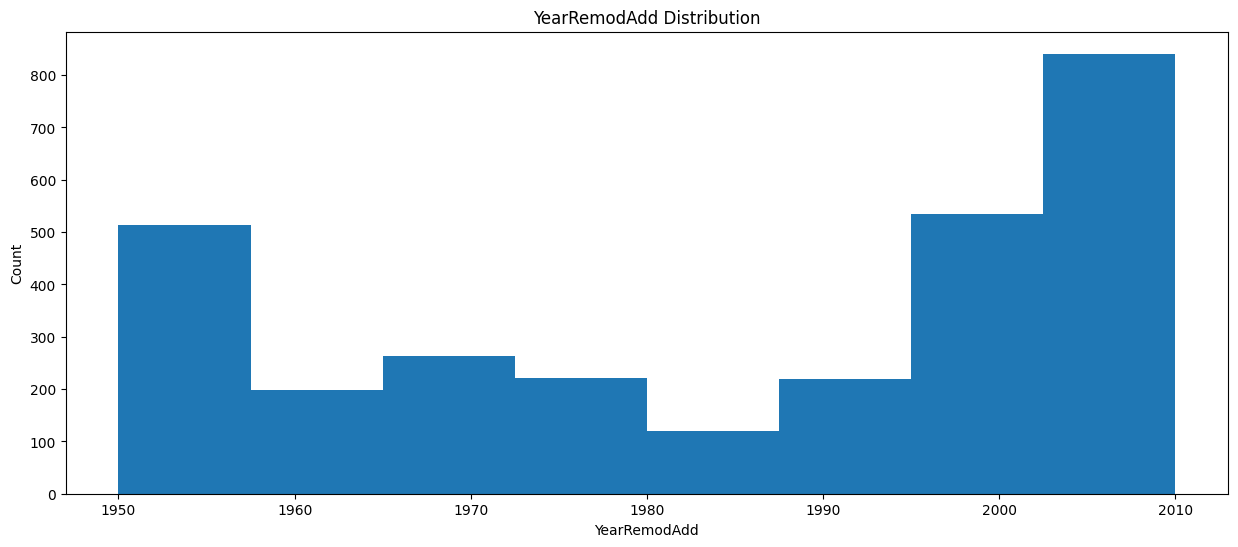

In [50]:
# # Plot Numerical Variables
# fig5 = px.histogram(df, x='YearRemodAdd', nbins=30, title='Histogram of YearRemodAdd')
# # Customize the appearance if needed
# fig5.update_layout(
#     xaxis_title='YearRemodAdd',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig5)
plt.figure(figsize=(15,6))
plt.hist(df['YearRemodAdd'], bins=8)
plt.title('YearRemodAdd Distribution')
plt.xlabel('YearRemodAdd')
plt.ylabel('Count')
plt.show()

Key Trends:

High Number of Remodels/Additions in Recent Years (2000-2010):

The highest bar in the histogram corresponds to the years between 2000 and 2010, indicating that a significant number of properties were remodeled or had additions during this period. This suggests that there has been an increasing trend in property updates or renovations in recent years.
Older Remodels/Additions (1950s):

There is also a significant number of properties that were remodeled or had additions in the 1950s. This indicates a period of significant remodeling or additions during that decade, possibly reflecting post-war housing expansion and modernization.
Low Activity Between 1960 and 1990:

The years between 1960 and 1990 show relatively low numbers of remodels or additions. This suggests that fewer properties underwent significant changes during these decades, or that homes from this period are less commonly represented in the dataset.
Moderate Activity in the 1990s:

There is a noticeable increase in the number of remodels or additions starting in the 1990s, leading up to the peak in the 2000-2010 period. This suggests that home renovation and improvement activity began picking up in the 1990s before becoming more widespread in the 2000s.

Summary:
The histogram indicates that most properties in this dataset were remodeled or had additions in the 1950s and the 2000-2010 period, with the latter showing the highest frequency. There is a noticeable lull in remodeling activity between 1960 and 1990, with a gradual increase starting in the 1990s and peaking in the early 21st century.

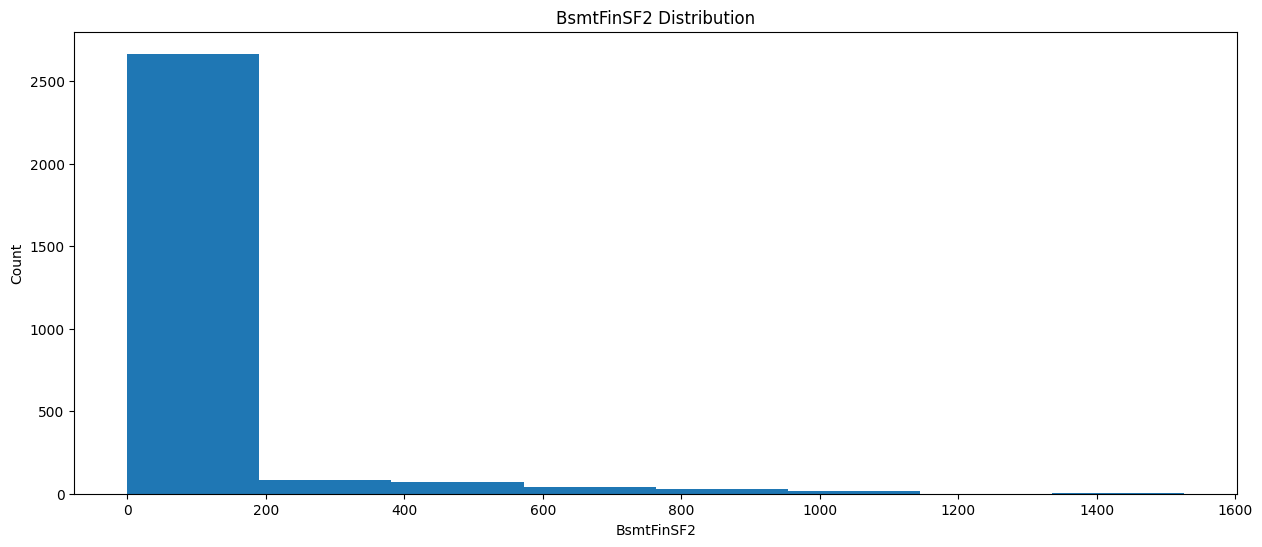

In [49]:
# Plot Numerical Variables
# fig6 = px.histogram(df, x='BsmtFinSF2', nbins=30, title='Histogram of BsmtFinSF2')
# # Customize the appearance if needed
# fig6.update_layout(
#     xaxis_title='BsmtFinSF2',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig6)
plt.figure(figsize=(15,6))
plt.hist(df['BsmtFinSF2'], bins=8)
plt.title('BsmtFinSF2 Distribution')
plt.xlabel('BsmtFinSF2')
plt.ylabel('Count')
plt.show()

Key Trends:

Predominantly Small or No Second Finished Basement Area:

The vast majority of properties have a "BsmtFinSF2" value close to zero. This suggests that most homes either do not have a second finished basement area or that the area is very small.
Few Properties with Larger Second Finished Basement Areas:

There are very few properties with a "BsmtFinSF2" value above 200 square feet, and the frequency continues to decrease as the square footage increases. This indicates that it is uncommon for homes in this dataset to have a large second finished basement area.
Right-Skewed Distribution:

The histogram is heavily right-skewed, meaning that while most homes have little to no second finished basement area, a small number of homes have significantly larger areas. However, these are quite rare.

Summary:
The histogram reveals that most homes in this dataset have little to no second finished basement area, with very few properties having larger spaces dedicated to a second finished area in the basement. The distribution is highly skewed towards the lower end, indicating that a large second finished basement area is uncommon among the homes in this dataset.

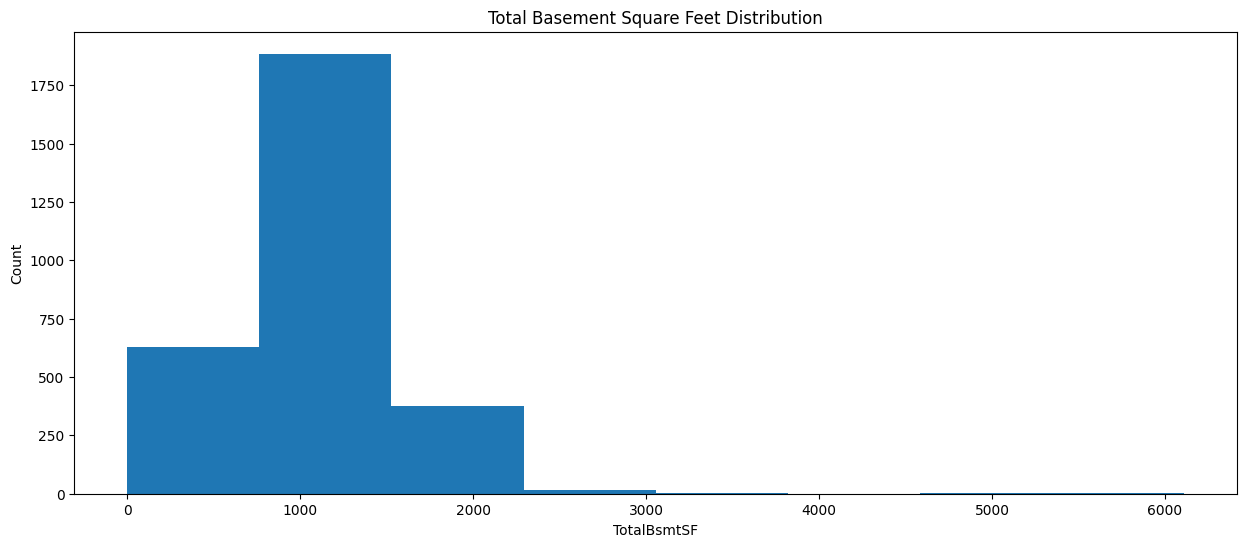

In [48]:
# # Plot Numerical Variables
# fig7 = px.histogram(df, x='TotalBsmtSF', nbins=30, title='Histogram of TotalBsmtSF')
# # Customize the appearance if needed
# fig7.update_layout(
#     xaxis_title='TotalBsmtSF',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig7)
plt.figure(figsize=(15,6))
plt.hist(df['TotalBsmtSF'], bins=8)
plt.title('Total Basement Square Feet Distribution')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Count')
plt.show()

Key Trends:

Most Common Basement Size Range:

The majority of properties have a basement size around 1,000 to 2,000 square feet. This is the tallest bar in the histogram, indicating that most homes in this dataset have basements within this size range.
Skewness:

The distribution is right-skewed, meaning there are fewer properties with larger basement sizes. This suggests that while some homes have large basements, the majority of them are smaller or mid-sized.
Low Frequency of Very Large Basements:

As the basement size increases beyond 2,000 square feet, the frequency of such large basements drops sharply. Very few properties have basements larger than 3,000 square feet.
Minimal Number of Homes with No Basement:

The leftmost bar indicates there are some properties with a basement size close to zero, implying that a small number of homes either have no basement or a very small basement.

Summary:
The histogram reveals that most homes in this dataset have a basement size between 1,000 and 2,000 square feet, with significantly fewer properties having larger basements. The distribution is skewed to the right, indicating that very large basements are uncommon.

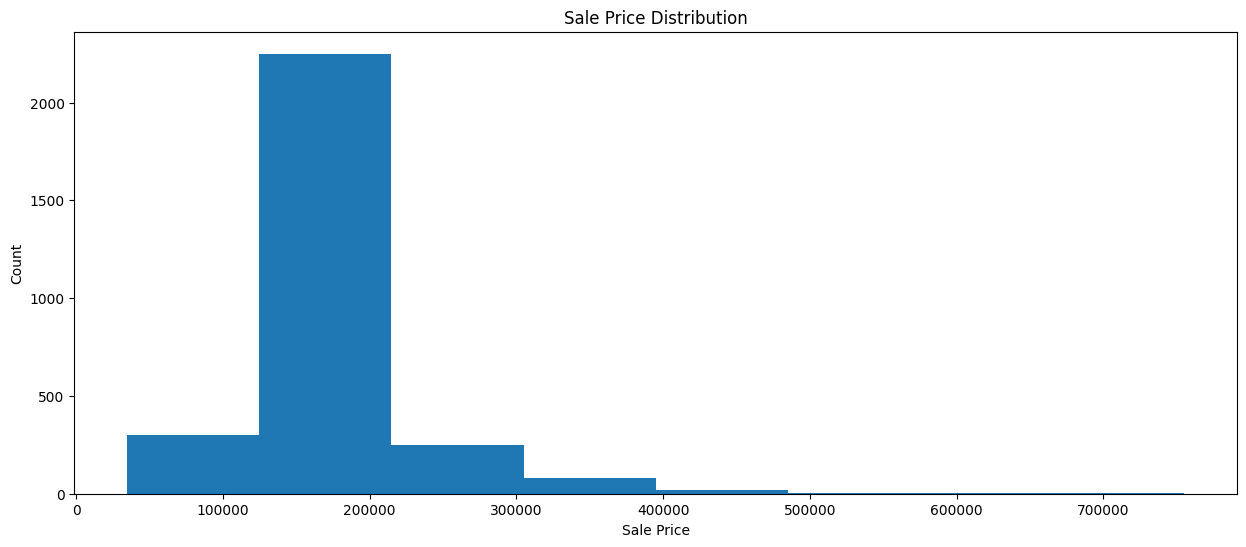

In [46]:
# Plot Numerical Variables
# fig8 = px.histogram(df, x='SalePrice', nbins=30, title='Histogram of SalePrice')
# # Customize the appearance if needed
# fig8.update_layout(
#     xaxis_title='SalePrice',
#     yaxis_title='Counts',
#     bargap=0.1,  # Adjust the gap between bars
#     title_x=0.5   # Center the title
#     )
# pyo.iplot(fig8)
plt.figure(figsize=(15,6))
plt.hist(df['SalePrice'], bins=8)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

Key Trends:

Most Common Sale Price Range:

The majority of the sale prices are clustered around the $150,000 to $200,000 range. This is the tallest bar in the histogram, indicating that most properties in this dataset are sold within this price range.
Skewness:

The distribution is right-skewed, meaning there are fewer properties with higher sale prices. This suggests that while most properties are sold at lower prices, there are some that sell for significantly higher amounts, though these are less common.
Low Frequency of High Sale Prices:

As the sale price increases beyond $300,000, the frequency of properties sold at these prices drops sharply. This indicates that high-priced properties are much less common in this dataset.
Minimal Sales Below $100,000:

There is a smaller, yet notable number of properties sold below $100,000, but this range is much less common compared to the $150,000 to $200,000 range.

Summary:
The histogram reveals that most homes in this dataset are sold for between $150,000 and $200,000, with significantly fewer properties sold at higher price points. The distribution is skewed to the right, indicating that while high-priced properties exist, they are relatively rare compared to more moderately priced homes.

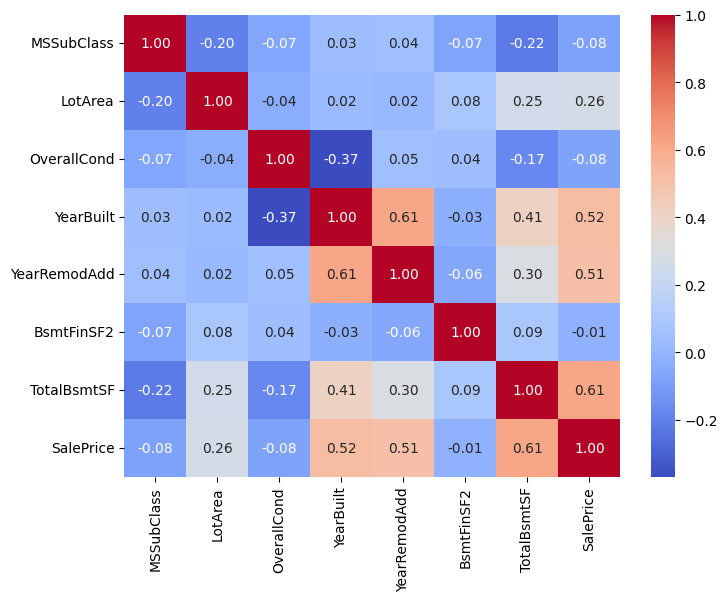

In [18]:
# Explore relationship between SalePrice and other numeric variables
import seaborn as sns

corr_matrix = numeric_columns.corr()
plt.figure(figsize= (8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

According to the correlation heatmap, SalePrice has moderate relationship with YearBuilt, YearRemodAdd, TotalBSmtSF. SalePrice also has weak relationship with LotArea

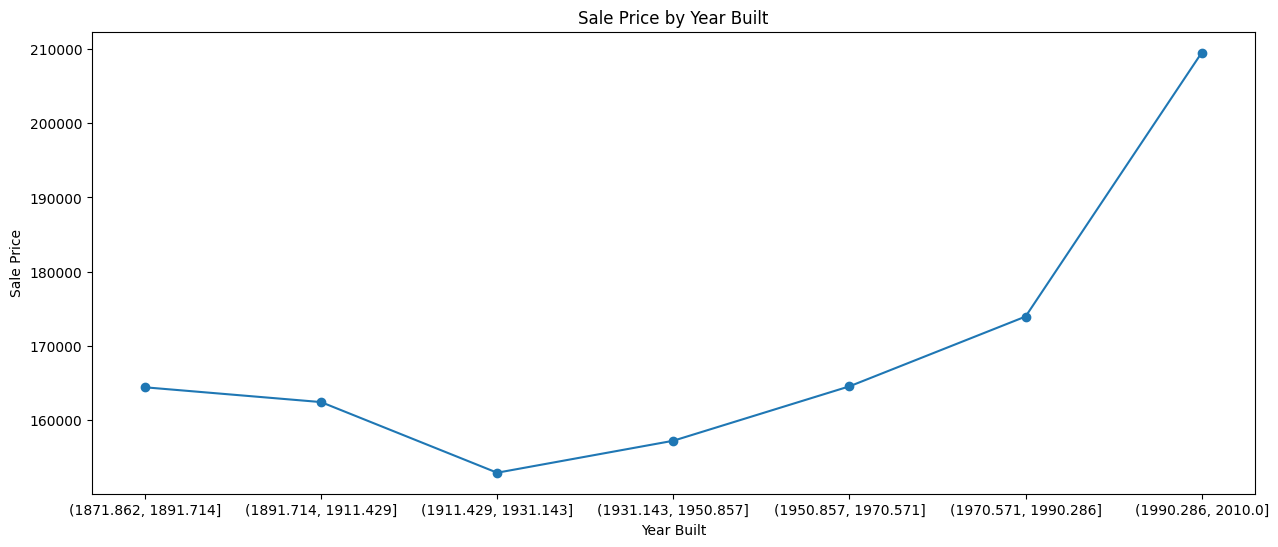

In [40]:
# Plot SalePrice chart based on YearBuilt
year_bins = pd.cut(df['YearBuilt'], bins =7)
groupby_yearbuilt = df.groupby(year_bins.astype(str))['SalePrice'].mean().reset_index()
# fig9 = px.line(groupby_yearbuilt, x= 'YearBuilt', y = 'SalePrice')
# fig9.update_layout(
#     title = {
#         'text':'Sale Price by Year',
#         'x': 0.5
#     },
#     xaxis_title = 'Year Built',
#     yaxis_title = 'Average Price'

# )
# pyo.iplot(fig9)
plt.figure(figsize=(15,6))
plt.plot(groupby_yearbuilt['YearBuilt'],groupby_yearbuilt['SalePrice'], marker = 'o')
plt.title('Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

Key Trends:

Decrease in Sale Prices for Older Homes (Pre-1931):

There is a downward trend in sale prices for homes built before 1931. This suggests that older homes generally sell for lower prices, possibly due to outdated features, design, or the need for significant renovations.
Lowest Sale Prices for Homes Built Between 1911 and 1931:

The lowest average sale prices are observed for homes built between approximately 1911 and 1931. This period may represent homes that are old enough to require major updates but not old enough to be considered historic or unique.
Steady Increase in Sale Prices After 1950:

After 1950, there is a steady increase in sale prices, indicating that newer homes tend to sell for higher prices. This trend continues as homes become more recent.
Sharp Increase in Sale Prices for Homes Built After 1990:

The most significant increase in sale prices occurs for homes built between 1990 and 2010. This indicates that homes built in more recent decades are valued much higher, likely due to modern construction standards, amenities, and designs that appeal to contemporary buyers.
General Trend of Increasing Value with Newer Construction:

The overall trend is that newer homes (those built closer to the present) have higher sale prices, which is consistent with the preference for modern construction and features.

Overall, the chart suggests that newer homes (especially those built after 1990) command significantly higher sale prices, while older homes, particularly those built before 1931, tend to have lower sale prices. This reflects the general market preference for newer, more modern properties.









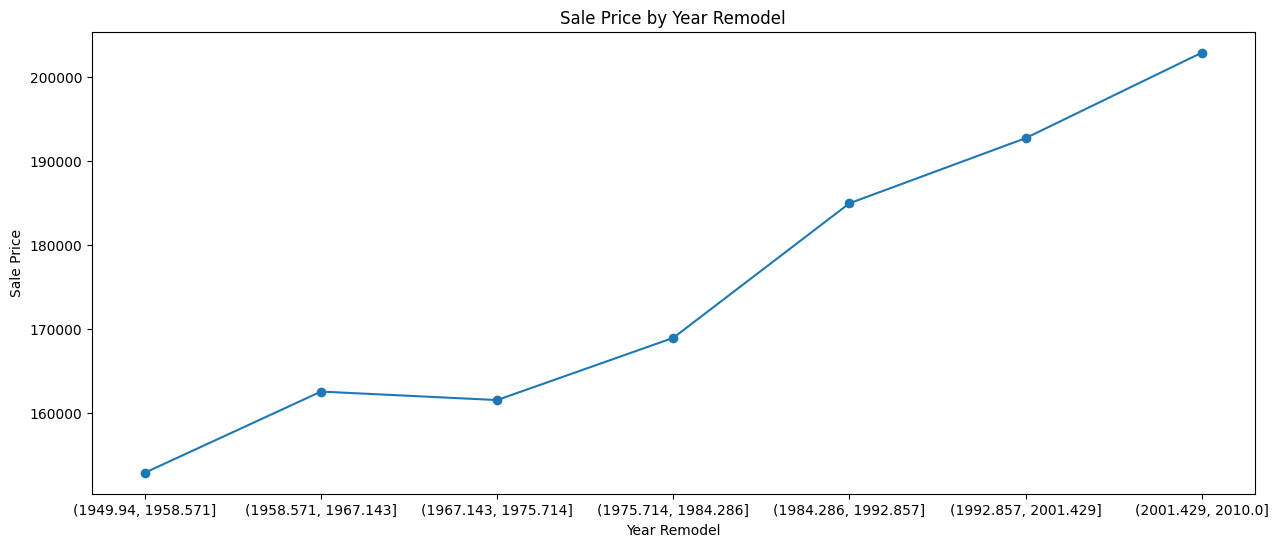

In [39]:
# Plot SalePrice chart based on YearRemodAdd
yearremodall_bins = pd.cut(df['YearRemodAdd'], bins =7)
groupby_yearremodadd = df.groupby(yearremodall_bins.astype(str))['SalePrice'].mean().reset_index()
# fig10 = px.line(groupby_yearbuilt, x= 'YearRemodAdd', y = 'SalePrice')
# fig10.update_layout(
#     title = {
#         'text':'Sale Price by Year',
#         'x': 0.5
#     },
#     xaxis_title = 'Year Remodel',
#     yaxis_title = 'Average Price'

# )
# pyo.iplot(fig10)

plt.figure(figsize=(15,6))
plt.plot(groupby_yearremodadd['YearRemodAdd'],groupby_yearremodadd['SalePrice'], marker = 'o')
plt.title('Sale Price by Year Remodel')
plt.xlabel('Year Remodel')
plt.ylabel('Sale Price')
plt.show()

Key Trends:

Increasing Sale Price Over Time:

The general trend is an increase in sale prices as the year of the remodel becomes more recent. This suggests that homes remodeled more recently tend to sell for higher prices.
Steady Increase After 1975:

There is a relatively flat trend in sale prices from around 1958 to 1975, indicating little to no increase in sale prices for homes remodeled during that period.
After 1975, there is a noticeable and steady increase in sale prices, particularly from the mid-1980s onward.
Sharpest Increase in the Most Recent Years:

The most significant increase in sale prices occurs in homes remodeled between 2001 and 2010. This could indicate that modern or recent renovations significantly boost a property's market value.
Lower Sale Prices for Older Remodels:

Homes remodeled in earlier years (before 1975) tend to have lower sale prices, which suggests that older renovations may be less appealing to buyers, or that the overall condition or style of these homes might not meet current market preferences.

Overall, the chart shows that more recent renovations correlate with higher sale prices, with a particularly strong upward trend in homes remodeled after 1984.

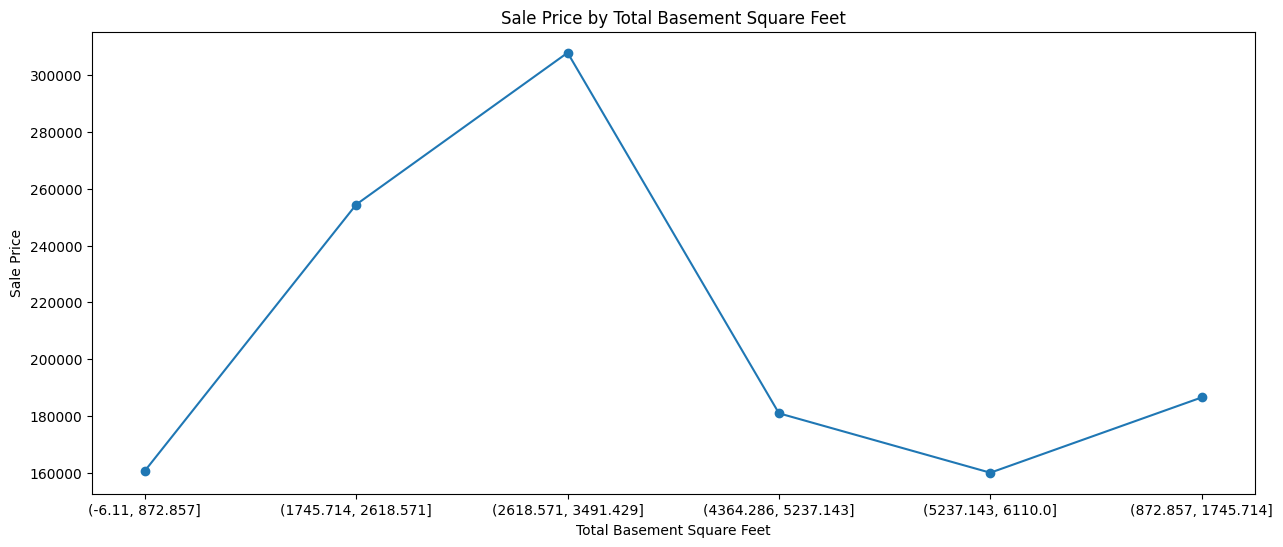

In [78]:
totalBsmt_bins = pd.cut(df['TotalBsmtSF'], bins= 7)
groupby_totalBsmt = df.groupby(totalBsmt_bins.astype(str))['SalePrice'].mean().reset_index()
# fig11 = px.bar(groupby_totalBsmt, x= 'TotalBsmtSF', y='SalePrice')
# pyo.iplot(fig11)
plt.figure(figsize=(15,6))
plt.plot(groupby_totalBsmt['TotalBsmtSF'], groupby_totalBsmt['SalePrice'], marker='o')
plt.title('Sale Price by Total Basement Square Feet')
plt.xlabel('Total Basement Square Feet')
plt.ylabel('Sale Price')
plt.show()

Key Trends:

Mid-Range Basement Square Footage Has the Highest Sale Prices:

The bin representing the basement square footage between approximately 2,618 and 3,491 square feet has the highest average sale price. This suggests that homes with a moderate amount of basement space tend to have higher sale prices.
Smallest and Largest Basement Square Footage Have Lower Sale Prices:

The smallest basement square footage bin (approximately -6 to 872 square feet) has a significantly lower average sale price.
Similarly, the largest basement square footage bin (approximately 5,237 to 6,110 square feet) also has a lower average sale price compared to the mid-range bins. This might indicate that very small or very large basements are less desirable or that other factors are at play.
Moderate Basement Square Footage is Associated with Higher Prices:

The bins for basement sizes between approximately 1,745 and 3,491 square feet generally show higher sale prices compared to smaller or larger sizes. This suggests that a moderate amount of basement space is seen as a valuable feature in homes.

Overall, the chart suggests that a mid-sized basement (particularly in the 2,618 to 3,491 square feet range) is associated with the highest sale prices, while both very small and very large basements may not contribute as much to the overall value of a home.

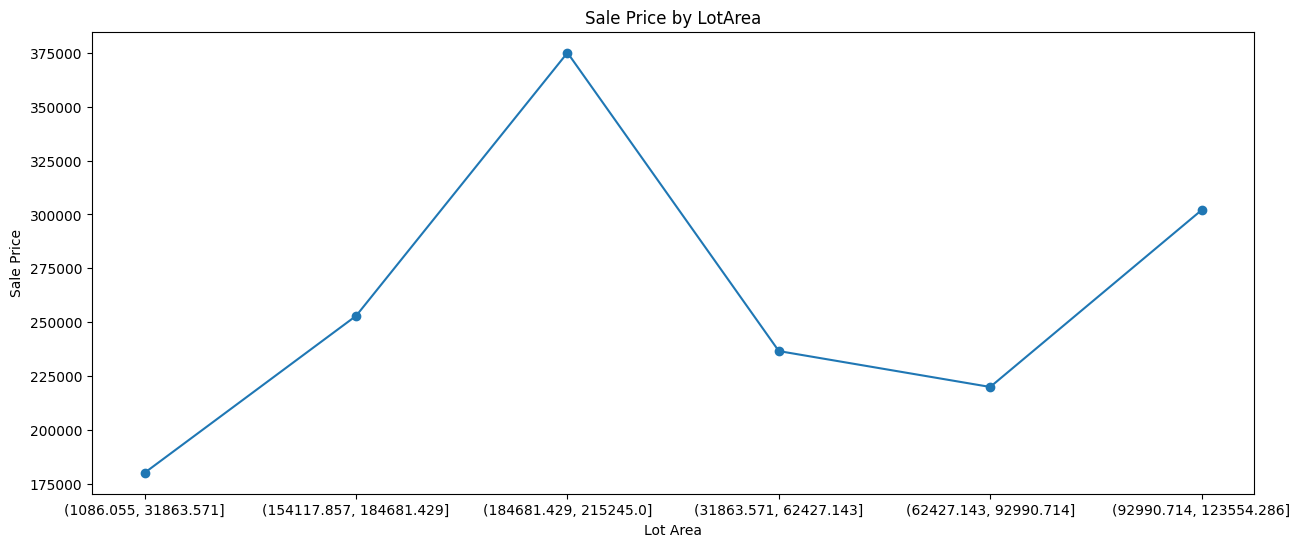

In [79]:
lotArea_bins = pd.cut(df['LotArea'], bins= 7)
groupby_totalBsmt = df.groupby(lotArea_bins.astype(str))['SalePrice'].mean().reset_index()
# fig12 = px.bar(groupby_totalBsmt, x= 'LotArea', y='SalePrice')
# pyo.iplot(fig12)
plt.figure(figsize=(15,6))
plt.plot(groupby_totalBsmt['LotArea'], groupby_totalBsmt['SalePrice'], marker='o')
plt.title('Sale Price by LotArea')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

Key Trends:

Largest Lot Areas Have the Highest Sale Price:

The bin representing the largest Lot Areas (approximately 184,681 to 215,245) has the highest average sale price, suggesting that properties with larger lot areas tend to have higher sale prices.
Smaller Lot Areas Have Lower Sale Prices:

The bin with the smallest Lot Areas (approximately 1,086 to 31,863) has the lowest average sale price, indicating that properties with smaller lot areas generally sell for less.
Moderate Lot Areas Have Varied Sale Prices:

For Lot Area bins in the mid-range (e.g., 62,427 to 92,990), the sale prices are lower than the largest lots but higher than the smallest ones. There is no clear linear trend across these mid-range bins, implying that factors other than just lot size might be influencing the sale prices in these categories.

Overall, the chart suggests a general trend where larger lot areas are associated with higher sale prices, though there may be other influencing factors in certain ranges.

In [23]:
import numpy as np
# Explore ralationships between SalePrice and categorical variables
def correlation_ratio(categories, measurements):
     # Overall mean of the measurements
    overall_mean = np.mean(measurements)
    
    # Unique categories
    categories_unique = np.unique(categories)
    
    # Numerator: sum of squares between groups
    numerator = 0
    for category in categories_unique:
        category_measurements = measurements[categories == category]
        category_mean = np.mean(category_measurements)
        numerator += len(category_measurements) * (category_mean - overall_mean) ** 2
    
    # Denominator: total sum of squares
    denominator = np.sum((measurements - overall_mean) ** 2)
    
    # Correlation ratio (eta squared)
    eta_squared = numerator / denominator
    
    return eta_squared
for col in categorical_columns.columns:
    eta_squared = correlation_ratio(df[col], df['SalePrice'])
    print(f"Correlation Ratio (η²) of {col}: {eta_squared}")



Correlation Ratio (η²) of MSZoning: 0.051391631000239975
Correlation Ratio (η²) of LotConfig: 0.011074169104000534
Correlation Ratio (η²) of BldgType: 0.016639457226718182
Correlation Ratio (η²) of Exterior1st: 0.07632393500372962


Based on correlation ratio values, there are no evidence to say 'MSZoning', 'LotConfig', 'BldgType', and 'Exterior1st' have relationship with 'SalePrice'. More data is needed to support the relationship betweeen these variables and SalePrice.